In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
image = cv2.imread('/content/pexels-pixabay-45853.jpg')
hgt, wdt,_ = image.shape

In [18]:
hgt, wdt

(3555, 5315)

## Display color formats

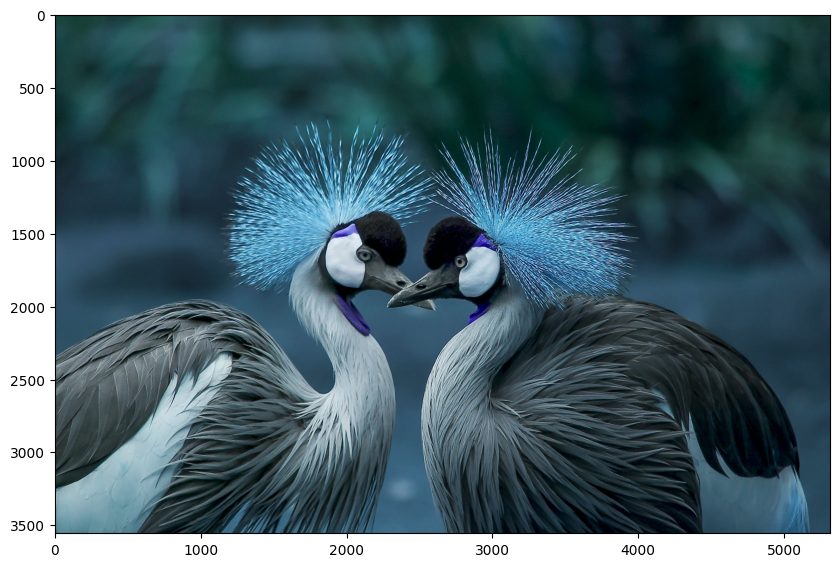

In [19]:
plt.figure(figsize=[10,7])
plt.imshow(image)
plt.show()

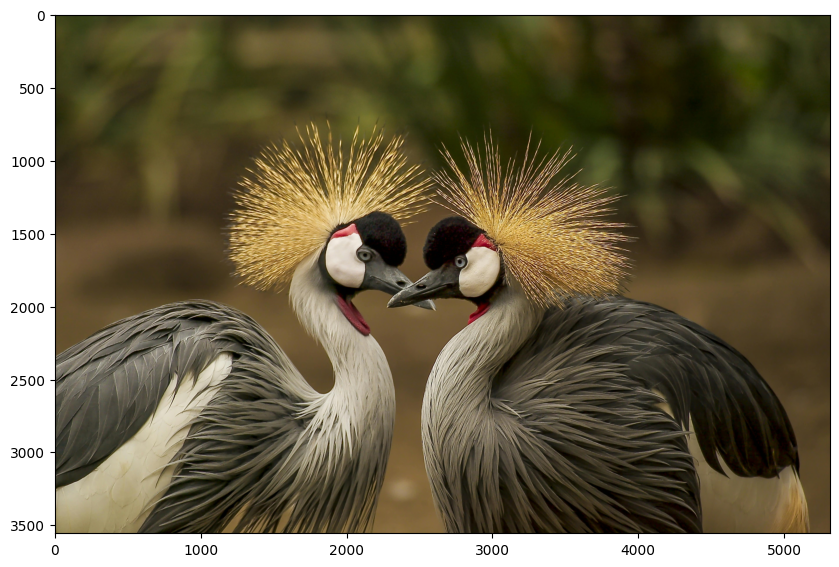

In [20]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=[10,7])
plt.imshow(image)
plt.show()

## Edge detection

In [21]:
x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

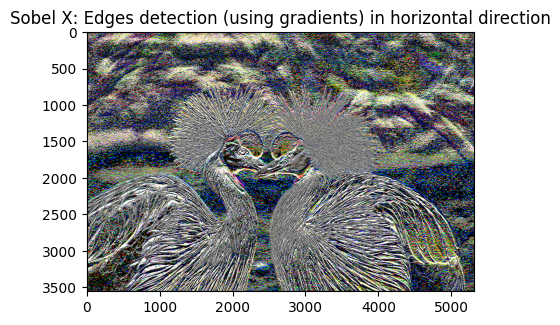

In [23]:
plt.figure(figsize=[5,5])
plt.title("Sobel X: Edges detection (using gradients) in horizontal direction")
plt.imshow(x_sobel)
plt.show()

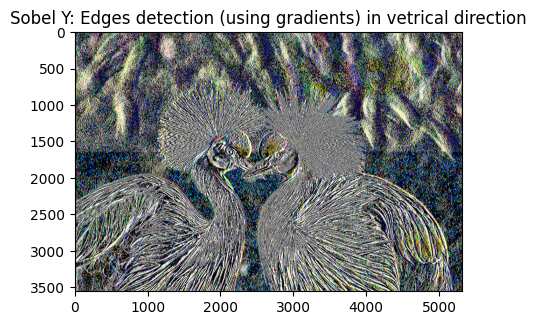

In [25]:
plt.figure(figsize=[5,5])
plt.title("Sobel Y: Edges detection (using gradients) in vetrical direction")
plt.imshow(y_sobel)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


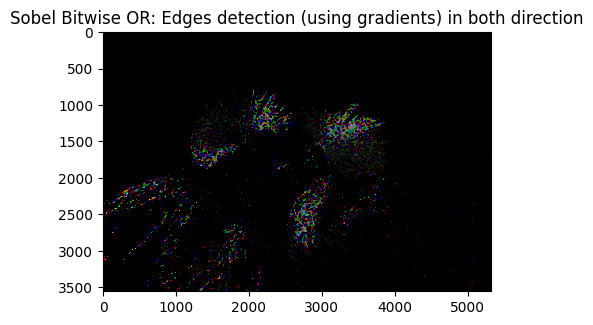

In [26]:
sobel_or = cv2.bitwise_or(x_sobel, y_sobel)
plt.figure(figsize=[5,5])
plt.title("Sobel Bitwise OR: Edges detection (using gradients) in both direction")
plt.imshow(sobel_or)
plt.show()

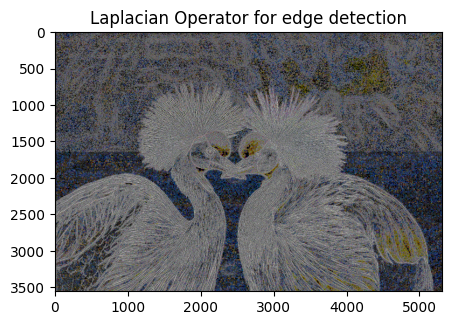

In [27]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.figure(figsize=[5,5])
plt.title("Laplacian Operator for edge detection")
plt.imshow(laplacian)
plt.show()

# # Wait for a key press
# k = cv2.waitKey(0)

# # Check if the 'Esc' key was pressed (ASCII value of 'Esc' key is 27)
# if k == 27:
#     cv2.destroyAllWindows()

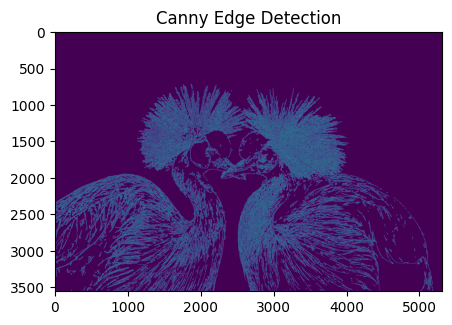

In [31]:
## There are two values: threshold1 and threshold2.
## Those gradients that are greater than threshold2 => considered as an edge
## Those gradients that are below threshold1 => considered not to be an edge.
## Those gradients Values that are in between threshold1 and threshold2 => either classiﬁed as edges or non-edges
# The first threshold gradient
canny = cv2.Canny(image, 10, 100)
plt.figure(figsize=[5,5])
plt.title("Canny Edge Detection")
plt.imshow(canny)
plt.show()

## Morphological Operations

1. Erosion -> Erode foreground pixels -> to remove small white noises from the foreground
2. Dialation -> Dialate foreground pixels -> to join broken parts of an object or expand size of an object
3. Opening -> erosion followed by a dilation -> to remove small objects from the foreground while preserving larger objects
4. Closing -> dilation followed by an erosion -> to close small holes or gaps in the foreground while preserving larger objects

In [33]:
rect_image = cv2.imread("/content/rect.jpg")

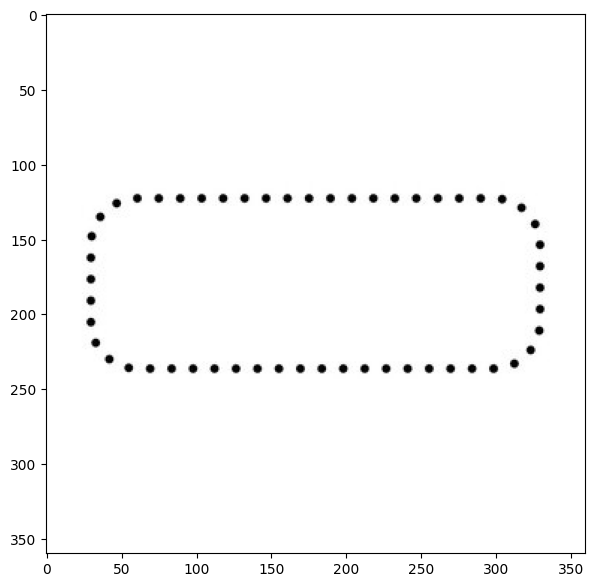

In [34]:
plt.figure(figsize=[10,7])
plt.imshow(rect_image)
plt.show()

In [35]:
# kernel of 5*5 ones
kernel = np.ones((5,5), np.uint8)

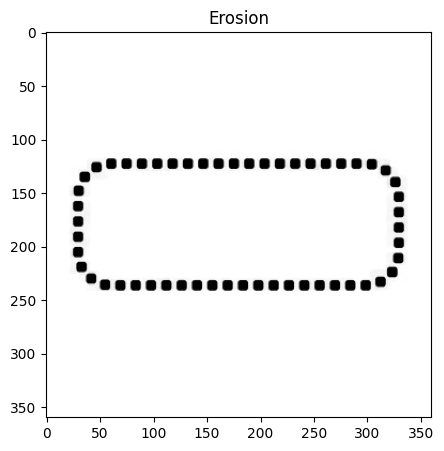

In [37]:
erosion = cv2.erode(rect_image, kernel, iterations = 1)
plt.figure(figsize=[5,5])
plt.title("Erosion")
plt.imshow(erosion)
plt.show()

White part got eroded because of which black part got bigger

In [38]:
# Split the image into channels
b, g, r = cv2.split(rect_image)

# Invert each channel
inverted_b = 255 - b
inverted_g = 255 - g
inverted_r = 255 - r

# Merge the inverted channels
inverted_rect = cv2.merge((inverted_b, inverted_g, inverted_r))

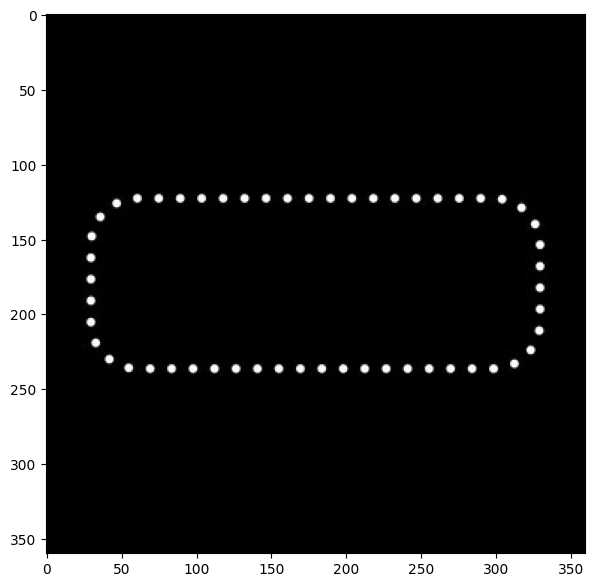

In [39]:
plt.figure(figsize=[10,7])
plt.imshow(inverted_rect)
plt.show()

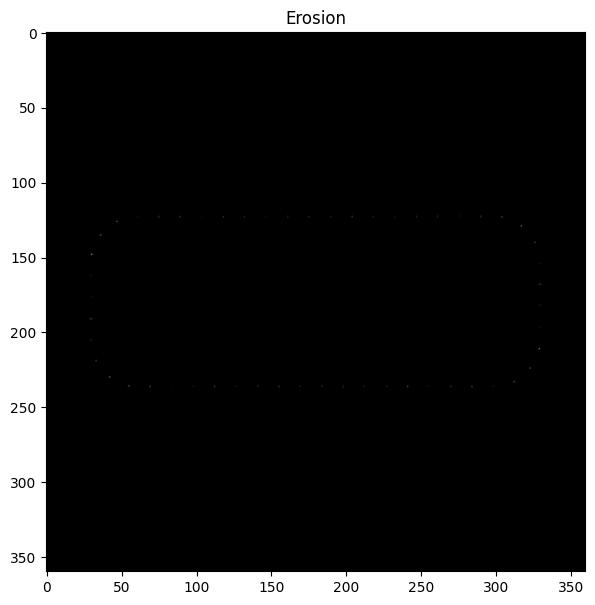

In [42]:
erosion = cv2.erode(inverted_rect, kernel, iterations = 1)
plt.figure(figsize=[10,7])
plt.title("Erosion")
plt.imshow(erosion)
plt.show()

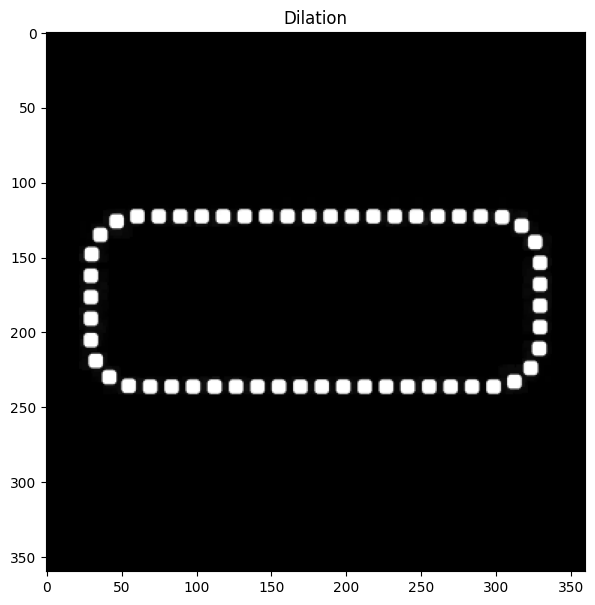

In [44]:
dilation = cv2.dilate(inverted_rect, kernel, iterations = 1)
plt.figure(figsize=[10,7])
plt.title("Dilation")
plt.imshow(dilation)
plt.show()

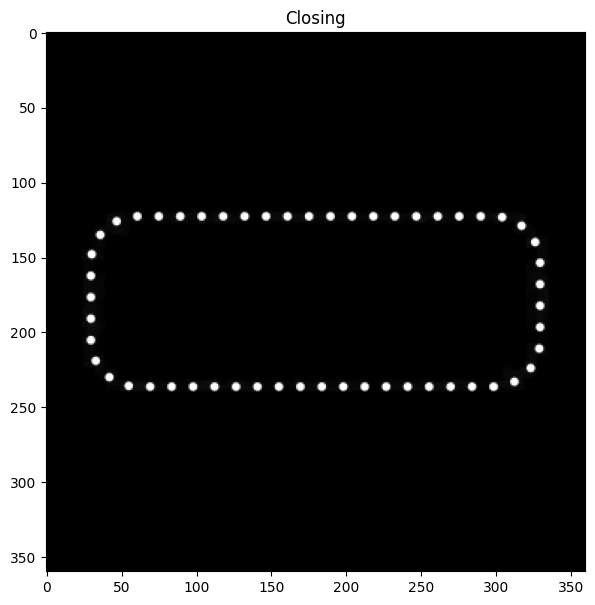

In [45]:
closing = cv2.morphologyEx(inverted_rect, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=[10,7])
plt.title("Closing")
plt.imshow(closing)
plt.show()

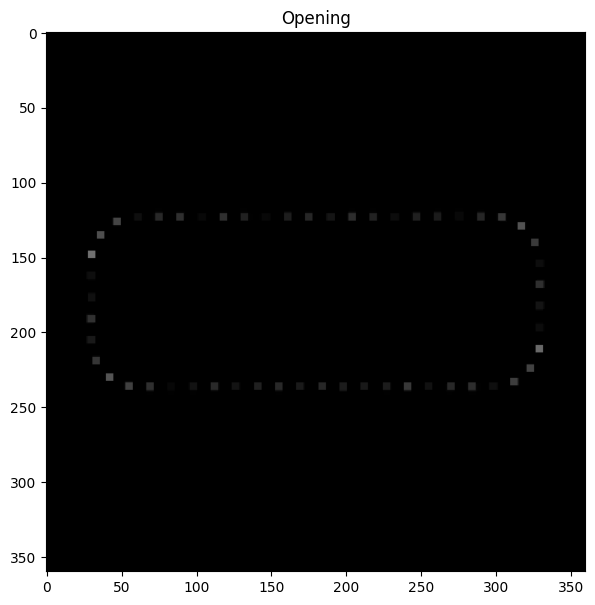

In [46]:
opening = cv2.morphologyEx(inverted_rect, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=[10,7])
plt.title("Opening")
plt.imshow(opening)
plt.show()

## Perspective

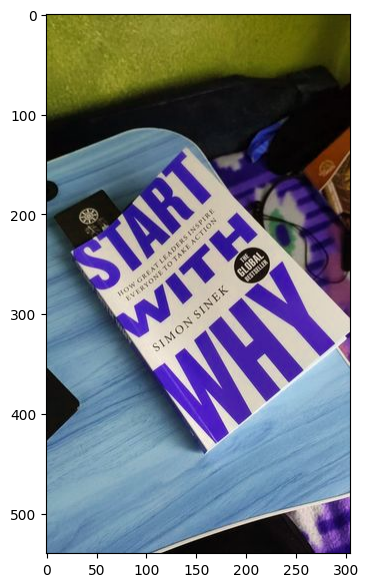

In [50]:
book = cv2.imread('/content/book.jpg')

plt.figure(figsize=[10,7])
plt.imshow(book)
plt.show()

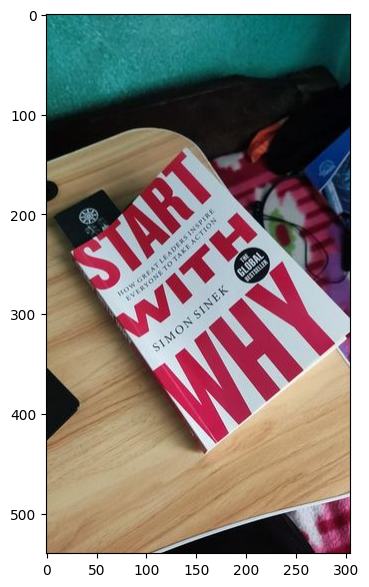

In [51]:
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10,7])
plt.imshow(book)
plt.show()

In [60]:
points_A = np.float32([[25,240],[143,133],[161,442],[302,321]]) # coordinates of book within the image
points_B = np.float32([[0,0],[200,0],[0,300],[200,300]]) # points to map book into after perspective warping

M = cv2.getPerspectiveTransform(points_A, points_B)
warped = cv2.warpPerspective(book, M, (200,300))

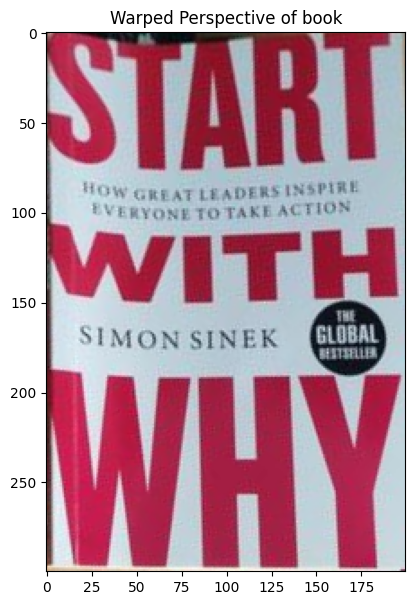

In [61]:
plt.figure(figsize=[10,7])
plt.title("Warped Perspective of book")
plt.imshow(warped)
plt.show()

## Image Pyramids